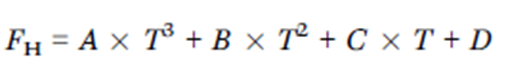
# Target Variable: Coeff_B
### We will try different models to estimate and predict the desired coefficient using final dataset features. Then we will compare the results for each of the models to find out which model works best for the same.

## Models Used:
### 1) Gaussian Process Regression: 
### 2) Ridge Regressor
### 3) Random Forest Regressor
### 4) XGBoost Regressor
### 5) Neural Network (Sequential)
### 6) Random Forest after PCA
### 7) Random Forest after Feature Analysis

# Gaussian Process Regression Model
### Gaussian Process Regression (GPR) is a non-parametric kernel-based probabilistic model. It predicts the distribution of possible values over a continuous output space for a given input. GPR is highly effective in capturing the uncertainty of the model predictions, making it ideal for scenarios where estimation of uncertainty is crucial. The model assumes a Gaussian distribution for the prior and updates this belief in the light of observed data.

In [2]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    Matern,
    RationalQuadratic,
    Exponentiation,
)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(
    r"D:\New_Python\Me793\coeffb\scaled_train_data.csv",
    encoding="cp1252",
)
data.fillna(0, inplace=True)

target = "Coeff_B"

Y = data[target]
X = data.drop([target, "Name"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = GaussianProcessRegressor(
    optimizer="fmin_l_bfgs_b",
    random_state=50,
    kernel=1.0 + 1.0 * Exponentiation(Matern(length_scale=1.0, nu=1.5), exponent=2),
    alpha=0.01,
    n_restarts_optimizer=1,
)

model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)

r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

R2 Score Train: 0.9985106606800154
Root Mean Square Error (RMSE) Train: 0.038202226566206324


R2 Score Test: 0.9666233422679598
Root Mean Square Error (RMSE) Test: 0.18812061616882572


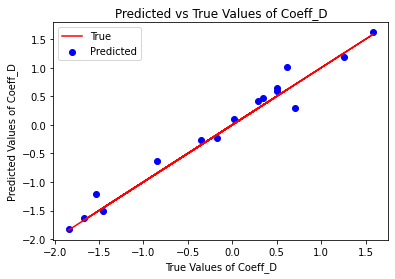

In [4]:
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# Ridge Regressor
### Ridge Regression is a technique used to analyze multiple regression data that suffer from multicollinearity. By introducing a degree of bias to the regression estimates (known as L2 regularization), it reduces the standard errors. It is particularly useful to mitigate the problem of overfitting by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge()

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = {'alpha': alphas}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
print("Best Alpha:", best_alpha)
# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

Best Alpha: 10.0
R2 Score Train: 0.9586474370981457
Root Mean Square Error (RMSE) Train: 0.20129967034272986


R2 Score Test: 0.9521986181422448
Root Mean Square Error (RMSE) Test: 0.22513094572360787


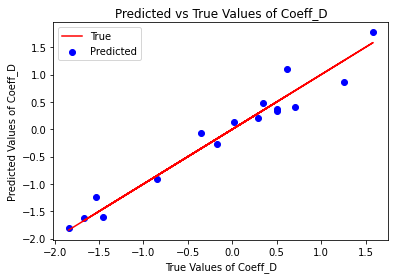

In [6]:
import matplotlib.pyplot as plt

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# Random forest regressor
### The Random Forest Regressor is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the mean or average prediction of the individual trees. This model is known for its robustness and ability to run efficiently on large databases. It can handle thousands of input variables without variable deletion and offers an effective method for estimating missing data while maintaining accuracy when a large proportion of the data are missing.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) and other hyperparameters
random_forest_model.fit(X_train, Y_train)

y_pred_train = random_forest_model.predict(X_train)

r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

R2 Score Train: 0.9862244816060902
Root Mean Square Error (RMSE) Train: 0.11618386606491896


R2 Score Test: 0.9413115938675386
Root Mean Square Error (RMSE) Test: 0.24945437636178372


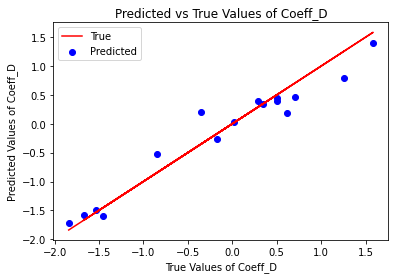

In [8]:
import matplotlib.pyplot as plt

y_pred_test = random_forest_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# XGBoost Regressor
### XGBoost (Extreme Gradient Boosting) is an implementation of gradient boosted decision trees designed for speed and performance. It is a scalable and highly efficient end-to-end tree boosting system that supports various objective functions, including regression, classification, and ranking. XGBoost provides a robust solution to many data science problems, significantly outperforming other algorithms whether in speed or performance.

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

num_boost_round = 100
xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

y_pred_train = xgb_model.predict(dtrain)

r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

R2 Score Train: 0.9999995163391409
Root Mean Square Error (RMSE) Train: 0.0006884340140125845


R2 Score Test: 0.9479382434026665
Root Mean Square Error (RMSE) Test: 0.23494942076355832


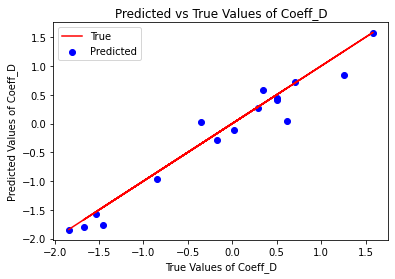

In [10]:
import matplotlib.pyplot as plt

y_pred_test = xgb_model.predict(dtest)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# Neural Network
### A Sequential Neural Network is a type of deep learning model that consists of a linear stack of layers. It is suitable for a plain stack of layers where each layer has exactly one input tensor and one output tensor. These networks are particularly useful for starting with neural networks as they allow you to easily build models layer by layer. They are widely used in applications ranging from regression to complex tasks like image recognition and natural language processing.

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import mean_squared_error

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dense(1)
])

nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

history = nn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred_train = nn_model.predict(X_train)

r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 1s - loss: 7.7435WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000290C753AAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

1/1 [==============================] - 0s 162ms/step
R2 Score Test: 0.91463750052872
Root Mean Square Error (RMSE) Test: 0.30084897174895586


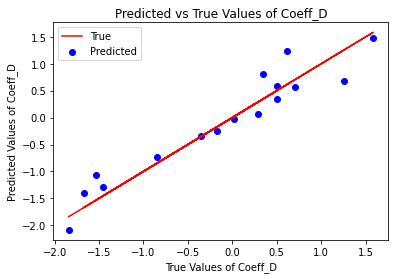

In [12]:
import matplotlib.pyplot as plt

y_pred_test = nn_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# DIMENSIONALITY REDUCTION
### This model uses Principal Component Analysis (PCA) followed by Random Forest Regression. PCA is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set. Applying Random Forest after PCA helps in improving model training time and effectiveness by reducing the number of features, which can help in mitigating issues like overfitting and improve model interpretability.

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

pca = PCA(n_components= 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, Y_train)

y_pred_train = model.predict(X_train_pca)

r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

R2 Score Train: 0.9983903685102609
Root Mean Square Error (RMSE) Train: 0.03971504674508161


R2 Score Test: 0.9487705832579809
Root Mean Square Error (RMSE) Test: 0.23306372084401117


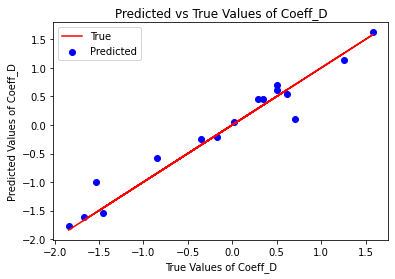

In [14]:
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test_pca)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# FEATURE ANALYSIS
### This model uses Principal Component Analysis (PCA) followed by Random Forest Regression. PCA is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set. Applying Random Forest after PCA helps in improving model training time and effectiveness by reducing the number of features, which can help in mitigating issues like overfitting and improve model interpretability.

Selected Features: Index(['X_EA', 'mean_A2B', 'X_Z', 'X_Rvdw', 'X_IEII', 'mean_X2X', 'A_Rvdw',
       'mean_A2X', 'A_IEI', 'E_coh', 'A_ChiA', 'B_Hf', 'X_G', 'std_A2X',
       'B_MP'],
      dtype='object')
R2 Score Test: 0.9221528973927942
Root Mean Square Error (RMSE) Test: 0.2873003774508834


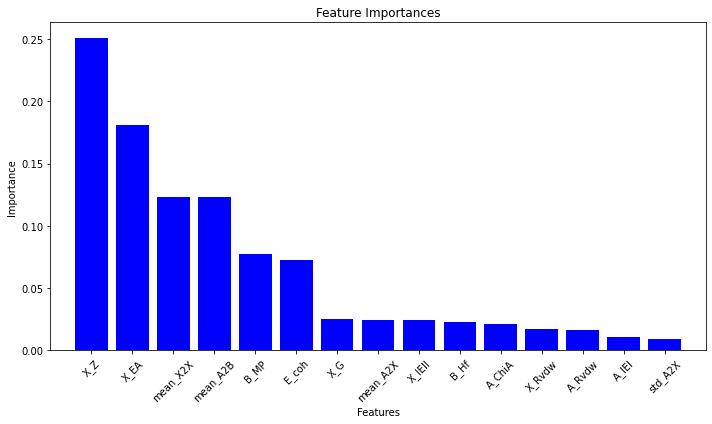

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

selector = SelectKBest(score_func=f_regression, k=15)

selector.fit(X_train, Y_train)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, Y_train)

y_pred_test = model.predict(X_test_selected)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_selected.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_selected.shape[1]), selected_feature_names[indices], rotation=45)
plt.xlim([-1, X_train_selected.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()